In [69]:
import torch
import json
import tqdm
import matplotlib.pyplot as plt
import math

In [71]:
def file_count(root_dir):
    import glob
    fnames = glob.glob(f"{root_dir}/[0-9]*.pth")
    return len(fnames)


def concatenate_files(root_dir):
    import glob
    fnames = glob.glob(f"{root_dir}/[0-9]*.pth")
    print("total files found: ", len(fnames))
    
    fnames = sorted(fnames)
    preds = []
    targets = []
    for fname in tqdm.notebook.tqdm(fnames):
        f = torch.load(fname)
        p = f["preds"]
        t = f["targets"]
        preds.append(p)
        targets.append(t)

    if len(preds) == 0:
        return
    preds = torch.stack(preds, dim=0)
    targets = torch.stack(targets, dim=0)

    f = {
        "preds": preds,
        "targets": targets
    }
    torch.save(f, f"{root_dir}/all.pth")

In [91]:
for i in [3, 4, 5, 6, 7]:
    print(f"{i}: ", file_count(f"./logs/stats/16nCr{i}/"), "out of", math.comb(16, i))
    concatenate_files(f"./logs/stats/16nCr{i}/")

3:  560 out of 560
total files found:  560


  0%|          | 0/560 [00:00<?, ?it/s]

4:  1820 out of 1820
total files found:  1820


  0%|          | 0/1820 [00:00<?, ?it/s]

5:  4368 out of 4368
total files found:  4368


  0%|          | 0/4368 [00:00<?, ?it/s]

6:  8008 out of 8008
total files found:  8008


  0%|          | 0/8008 [00:00<?, ?it/s]

7:  11440 out of 11440
total files found:  11440


  0%|          | 0/11440 [00:00<?, ?it/s]

## Choose 4

In [77]:
# def process_configs_slow(fname):
    
#     def process_config(preds, targets):
#         class_accuracies = torch.zeros(
#             num_classes, dtype=float
#         )
#         TP = preds == targets
#         for class_id in range(num_classes):
#             class_mask = targets == class_id
#             class_accuracy = (TP[class_mask]).sum() / max(class_mask.sum(), 1)
#             class_accuracies[class_id] = class_accuracy

#         return class_accuracies
    
#     all_config_results = torch.load(fname)
#     num_configs = len(all_config_results["preds"])
#     preds = all_config_results["preds"].cuda()
#     targets = all_config_results["targets"].cuda()
#     class_vs_config_accuracies = torch.zeros(num_classes, num_configs, dtype=float, device="cuda")
#     # WITHOUT VECTORIZATION THIS IS SLOWER:
#     for config_id in tqdm.notebook.tqdm(range(num_configs)):
#         try:
#             p, t = preds[config_id], targets[config_id]
#             class_accuracies = process_config(p, t)
#             class_vs_config_accuracies[:, config_id] = class_accuracies
#         except FileNotFoundError:
#             print("missing", fname)
#             pass
#     return class_vs_config_accuracies.cpu()
# class_vs_config_accuracies_slow = process_configs_slow("./logs/stats/16nCr3/all.pth")


num_classes = 1000
def process_configs(fname):
    all_config_results = torch.load(fname)
    num_configs = len(all_config_results["preds"])
    preds = all_config_results["preds"].cuda()
    targets = all_config_results["targets"].cuda()
    class_vs_config_accuracies = torch.zeros(num_classes, num_configs, dtype=float, device="cuda")


    TP = preds == targets
    TP.cuda()
    for class_id in tqdm.notebook.tqdm(range(num_classes)):
        class_mask = targets == class_id
        class_accuracy = (TP * class_mask).sum(dim=1) / class_mask.sum(dim=1)
        class_vs_config_accuracies[class_id] = class_accuracy
    return class_vs_config_accuracies.cpu()

    
class_vs_config_accuracies = process_configs("./logs/stats/16nCr3/all.pth")
num_configs = class_vs_config_accuracies.shape[1]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [244]:
for i in [3, 4, 5, 6, 7]:
    print(f"{i}: ", file_count(f"./logs/stats/16nCr{i}/"), "out of", math.comb(16, i))
    class_vs_config_accuracies = process_configs(f"./logs/stats/16nCr{i}/all.pth")
    torch.save(class_vs_config_accuracies, f"class_vs_config_accuracies_16nCr{i}.pth")

3:  560 out of 560


  0%|          | 0/1000 [00:00<?, ?it/s]

4:  1820 out of 1820


  0%|          | 0/1000 [00:00<?, ?it/s]

5:  4368 out of 4368


  0%|          | 0/1000 [00:00<?, ?it/s]

6:  8008 out of 8008


  0%|          | 0/1000 [00:00<?, ?it/s]

7:  11440 out of 11440


  0%|          | 0/1000 [00:00<?, ?it/s]

In [80]:
class_vs_config_accuracies.max(dim=1).values.mean()

tensor(0.8841, dtype=torch.float64)

Text(0, 0.5, 'num of best performing classes')

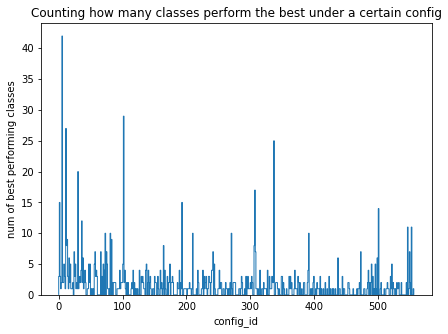

In [79]:
plt.figure(figsize=[7, 5])
plt.hist(class_vs_config_accuracies.argmax(dim=1).numpy(), num_configs, histtype="step")
plt.title("Counting how many classes perform the best under a certain config")
plt.xlabel("config_id")
plt.ylabel("num of best performing classes")

Text(0, 0.5, 'num of worst performing classes')

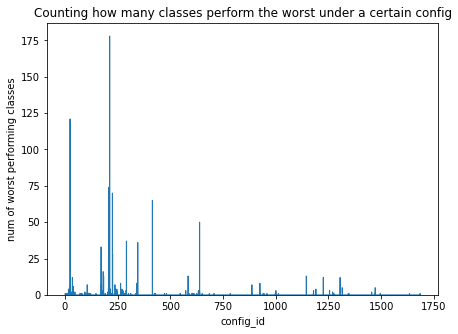

In [109]:
plt.figure(figsize=[7, 5])
plt.hist(class_vs_config_accuracies.argmin(dim=1).numpy(), num_configs, histtype="step")
plt.title("Counting how many classes perform the worst under a certain config")
plt.xlabel("config_id")
plt.ylabel("num of worst performing classes")

## Choose 7

In [152]:
class_vs_config_accuracies = process_configs("logs/stats/16nCr7/all.pth")
num_configs = class_vs_config_accuracies.shape[1]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [153]:
class_vs_config_accuracies.max(dim=1).values.mean()

tensor(0.9404, dtype=torch.float64)

Text(0, 0.5, 'num of best performing classes')

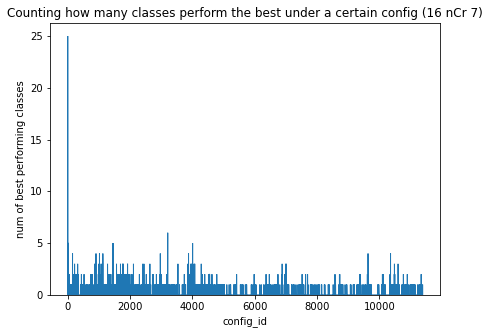

In [157]:
plt.figure(figsize=[7, 5])
plt.hist(class_vs_config_accuracies.argmax(dim=1).numpy(), num_configs, histtype="step")
plt.title("Counting how many classes perform the best under a certain config (16 nCr 7)")
plt.xlabel("config_id")
plt.ylabel("num of best performing classes")

Text(0, 0.5, 'num of worst performing classes')

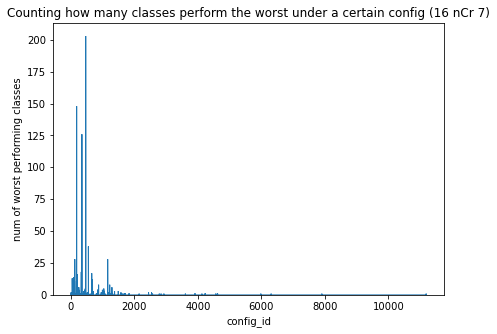

In [155]:
plt.figure(figsize=[7, 5])
plt.hist(class_vs_config_accuracies.argmin(dim=1).numpy(), num_configs, histtype="step")
plt.title("Counting how many classes perform the worst under a certain config (16 nCr 7)")
plt.xlabel("config_id")
plt.ylabel("num of worst performing classes")

## Find optimal architecture on Val1 and test on Val2

In [84]:
x = torch.load(f"./logs/stats/16nCr3/all.pth")
preds = x["preds"]
targets = x["targets"]

In [107]:
accuracy(preds[0], targets[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

tensor([0.5600, 0.7200, 0.7200, 0.5400, 0.8200, 0.7400, 0.4400, 0.4000, 0.6400,
        0.7600, 0.4400, 0.8600, 0.3800, 0.5600, 0.6600, 0.3600, 0.5000, 0.5400,
        0.6600, 0.5800, 0.6000, 0.5800, 0.7800, 0.6800, 0.5600, 0.6400, 0.5600,
        0.4400, 0.4200, 0.7200, 0.6600, 0.7000, 0.1600, 0.5200, 0.5400, 0.3400,
        0.5200, 0.5200, 0.4600, 0.3400, 0.4400, 0.6800, 0.4800, 0.1600, 0.4400,
        0.6800, 0.5200, 0.4800, 0.6600, 0.4200, 0.3400, 0.5200, 0.6400, 0.7000,
        0.4600, 0.8000, 0.7600, 0.7600, 0.5400, 0.5000, 0.5200, 0.5800, 0.3000,
        0.7200, 0.4200, 0.5800, 0.4600, 0.3800, 0.3800, 0.6000, 0.8400, 0.8600,
        0.6400, 0.3000, 0.3800, 0.7800, 0.6800, 0.5400, 0.7600, 0.5800, 0.7000,
        0.5200, 0.3600, 0.7200, 0.6800, 0.6200, 0.5600, 0.8000, 0.7400, 0.8000,
        0.7200, 0.5200, 0.7800, 0.8200, 0.6800, 0.3400, 0.9000, 0.7800, 0.8800,
        0.7600, 0.7800, 0.2400, 0.8200, 0.5600, 0.3600, 0.2800, 0.3600, 0.8600,
        0.6000, 0.8000, 0.7000, 0.8200, 

In [129]:
num_classes = 1000
def process_configs_trainval(fname, train_val_proportion=0.5):
    all_config_results = torch.load(fname)
    num_configs = len(all_config_results["preds"])
    preds = all_config_results["preds"].cuda()
    targets = all_config_results["targets"].cuda()
    
    
    train_size = int(preds.shape[1] * train_val_proportion)
    train_preds = preds[:, :train_size]
    train_targets = targets[:, :train_size]
    
    # TRAIN
    train_class_vs_config_accuracies = torch.zeros(num_classes, num_configs, dtype=float, device="cuda")
    TP = train_preds == train_targets
    TP.cuda()
    for class_id in tqdm.notebook.tqdm(range(num_classes)):
        class_mask = train_targets == class_id
        class_accuracy = (TP * class_mask).sum(dim=1) / class_mask.sum(dim=1)
        train_class_vs_config_accuracies[class_id] = class_accuracy
    
    best_config_per_class = train_class_vs_config_accuracies.argmax(dim=1)
    
    def class_accuracy(preds, targets, class_id):
        TP = preds == targets
        class_mask = targets == class_id
        accuracy = (TP * class_mask).sum() / max(class_mask.sum(), 1)
#         accuracy = (TP * class_mask).sum() / class_mask.sum()


        return accuracy
    
    
    val_preds = preds[:, train_size:]
    val_targets = targets[:, train_size:]
    val_accuracies = torch.zeros(num_classes, dtype=float, device="cuda")
    for class_id in range(num_classes):
        val_accuracies[class_id] = class_accuracy(
            val_preds[best_config_per_class[class_id]],
            val_targets[best_config_per_class[class_id]],
            class_id
        )
    return val_accuracies

In [130]:
numblockdropped_vs_acc = {}
for k in [3, 4, 5, 6, 7]:
    proportion_vs_acc = {}
    for proportion in tqdm.notebook.tqdm(torch.linspace(0.05, 0.9, 20)):
        val_accuracies = process_configs_trainval(f"./logs/stats/16nCr{k}/all.pth", train_val_proportion=proportion)
        proportion_vs_acc[proportion.item()] = val_accuracies.mean().item()
    numblockdropped_vs_acc[k] = proportion_vs_acc

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [131]:
torch.save(numblockdropped_vs_acc, "numblockdropped_vs_acc_3-7_0.05-0.9_step20.pth")

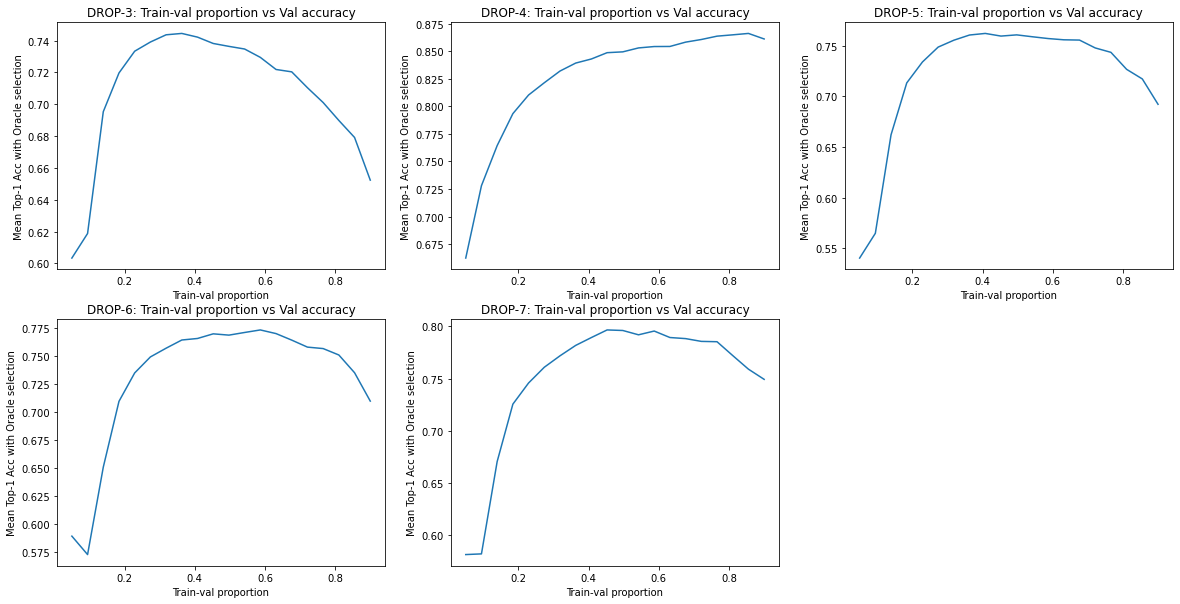

In [144]:
plt.figure(figsize=[20, 10])
for i, k in enumerate([3, 4, 5, 6, 7], start=1):
    proportion_vs_acc = numblockdropped_vs_acc[k]
    plt.subplot(2, 3, i)
    plt.plot(proportion_vs_acc.keys(), proportion_vs_acc.values())
    plt.title(f"DROP-{k}: Train-val proportion vs Val accuracy")
    plt.xlabel("Train-val proportion")
    plt.ylabel("Mean Top-1 Acc with Oracle selection")
plt.show()

## Find clustered labels correspondance

When multiple class chooses the same configuration find which classes are those and if there is any semantically meaninngful connection between

In [205]:
import json
imagenet_id_to_str = json.load(open("imagenet_class_index.json"))
imagenet_id_to_str = {int(k):v[1] for k, v in imagenet_id_to_str.items()}

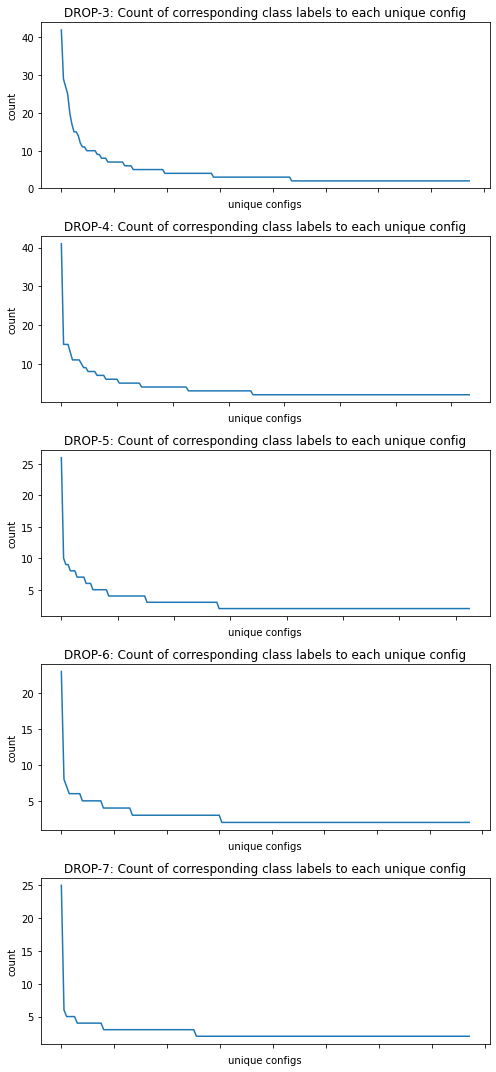

In [262]:
plt.figure(figsize=[7, 15])
for i, k in enumerate([3, 4, 5, 6, 7], start=1):    
#     class_vs_config_accuracies = process_configs(f"logs/stats/16nCr{k}/all.pth")
    class_vs_config_accuracies = torch.load(f"class_vs_config_accuracies_16nCr{k}.pth")
    num_configs = class_vs_config_accuracies.shape[1]

    def unique(x, dim=-1):
        unique, inverse = torch.unique(x, return_inverse=True, dim=dim)
        perm = torch.arange(inverse.size(dim), dtype=inverse.dtype, device=inverse.device)
        inverse, perm = inverse.flip([dim]), perm.flip([dim])
        return unique, inverse.new_empty(unique.size(dim)).scatter_(dim, inverse, perm)
    best_config_per_class = class_vs_config_accuracies.argmax(dim=1)
    unique_val, unique_ind = unique(best_config_per_class)
    _, unique_count = torch.unique(class_vs_config_accuracies.argmax(dim=1), return_counts=True)


    # Find configs that have more than 1 occurence:
    config_vs_best_classids = {}
    config_mask = unique_count > 1

    for config_id in unique_val[config_mask]:
        best_classids = torch.nonzero(best_config_per_class == config_id).flatten().tolist()
        config_vs_best_classids[config_id.item()] = best_classids

    config_vs_best_classtxt = {}
    for config_id, best_classids in config_vs_best_classids.items():
        class_txts = [imagenet_id_to_str[cid] for cid in best_classids]
        config_vs_best_classtxt[config_id] = class_txts

    config_vs_best_classtxt = {
        k: v
        for k, v in sorted(config_vs_best_classtxt.items(), key=lambda item: -len(item[1]))
    }
    
    plt.subplot(5, 1, i)
    plt.plot(range(len(config_vs_best_classtxt)), [len(v) for v in config_vs_best_classtxt.values()], )
    plt.title(f"DROP-{k}: Count of corresponding class labels to each unique config")
    plt.ylabel("count")
    plt.xlabel("unique configs")
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    plt.tight_layout()

In [242]:
for k, v in config_vs_best_classtxt.items():
    print(f"{k},{','.join(v)}")

8,junco,great_grey_owl,scorpion,tarantula,echidna,wallaby,European_gallinule,papillon,Samoyed,dhole,African_hunting_dog,Angora,Arabian_camel,armadillo,three-toed_sloth,proboscis_monkey,lesser_panda,corkscrew,fireboat,maypole,web_site,buckeye,earthstar
2928,black_stork,fly,ox,giant_panda,minivan,plastic_bag,whiskey_jug,lakeside
924,tench,jacamar,slug,Norwich_terrier,Welsh_springer_spaniel,carpenter's_kit,yawl
612,Italian_greyhound,Great_Pyrenees,neck_brace,teddy,pineapple,geyser
750,frilled_lizard,curly-coated_retriever,Sussex_spaniel,EntleBucher,kit_fox,sloth_bear
2448,pug,sulphur_butterfly,anemone_fish,magnetic_compass,volleyball,bagel
2925,kite,hornbill,accordion,bulletproof_vest,shield,book_jacket
4136,white_stork,Mexican_hairless,bow,grocery_store,Loafer,tricycle
2,spoonbill,ruddy_turnstone,Leonberg,pillow,tank
10,vulture,hummingbird,clumber,Rottweiler,lion
18,American_egret,redshank,Bernese_mountain_dog,hamster,daisy
738,Japanese_spaniel,Walker_hound,lotion,milk_can,overskirt
816,